## Mongobch results

### Deployment
Mongodb(1 node) and mongobch.py run on the same workstation.

Xeon Core i3-3210, 3.2GHz, 8Gb RAM

In [1]:
usePackage <- function(p) {
  if (!is.element(p, installed.packages()[,1]))
    install.packages(p, dep = TRUE)
  require(p, character.only = TRUE, quietly = TRUE)
}

usePackage("data.table") 
usePackage("ggplot2")

Sys.setlocale("LC_TIME", "us")

options(stringsAsFactors = FALSE)

[1] "English_United States.1252"

In [7]:
raw <- fread('grep Thread ..\\logs\\win_local_bench_400K*', 
             sep=",", 
             col.names=c("time", "response_time", "case", "bytes", "thread", "label"))


tidy <- data.table(raw, do.call(rbind, strsplit(raw$label,"-")))

setnames(tidy, "V1", "deployment")
setnames(tidy, "V2", "posts_num")
setnames(tidy, "V3", "thread_num")


tidy$thread_num <- as.numeric(tidy$thread_num)
tidy$posts_num <- as.numeric(tidy$posts_num)

#tidy$time <- as.POSIXct(sapply(strsplit(tidy$time, ":"), function(x){ paste(x[2:4], collapse=":")}), tz="", format="%Y-%m-%d %H:%M:%OS")

tidy$time <- as.POSIXct(tidy$time, tz="", format="%Y-%m-%d %H:%M:%OS")

head(tidy)
tail(tidy)

time,response_time,case,bytes,thread,label,deployment,posts_num,thread_num
2018-06-08 18:19:35,0.0000000,started,0,Thread-0,windows-400000-5,windows,4e+05,5
2018-06-08 18:19:35,0.0000000,started,0,Thread-1,windows-400000-5,windows,4e+05,5
2018-06-08 18:19:35,0.0000000,started,0,Thread-2,windows-400000-5,windows,4e+05,5
2018-06-08 18:19:35,0.0000000,started,0,Thread-3,windows-400000-5,windows,4e+05,5
2018-06-08 18:19:35,0.0000000,started,0,Thread-4,windows-400000-5,windows,4e+05,5
2018-06-08 18:19:35,0.0485332,read,1086,Thread-0,windows-400000-5,windows,4e+05,5


time,response_time,case,bytes,thread,label,deployment,posts_num,thread_num
2018-06-08 18:19:54,0.0009977818,read,1086,Thread-27,windows-400000-40,windows,4e+05,40
2018-06-08 18:19:54,0.0009994507,read,4182,Thread-32,windows-400000-40,windows,4e+05,40
2018-06-08 18:19:54,0.0009987354,read,1086,Thread-27,windows-400000-40,windows,4e+05,40
2018-06-08 18:19:54,6.4190988541,finished,0,Thread-32,windows-400000-40,windows,4e+05,40
2018-06-08 18:19:54,0.0010025501,upvote,0,Thread-27,windows-400000-40,windows,4e+05,40
2018-06-08 18:19:54,6.4779217243,finished,0,Thread-27,windows-400000-40,windows,4e+05,40


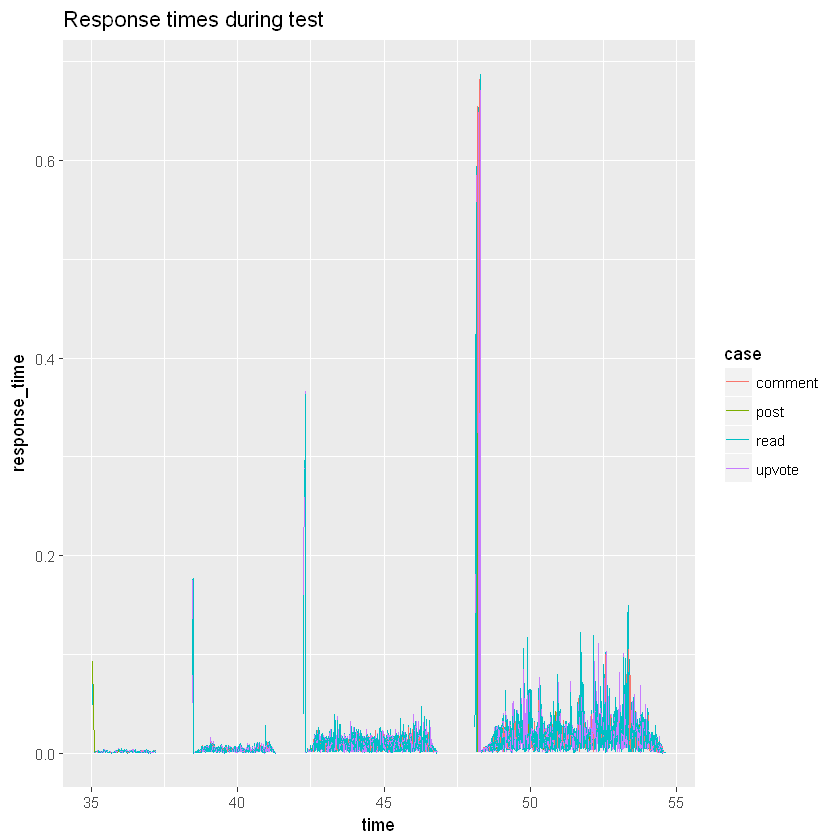

In [8]:
  ggplot(data = tidy[case != "finished"][case != "started"][posts_num==400000], 
         aes(x=time, 
             y=response_time, 
             group=thread_num, 
             colour=case)) + 
    geom_line() + ggtitle(paste0("Response times during test")) 

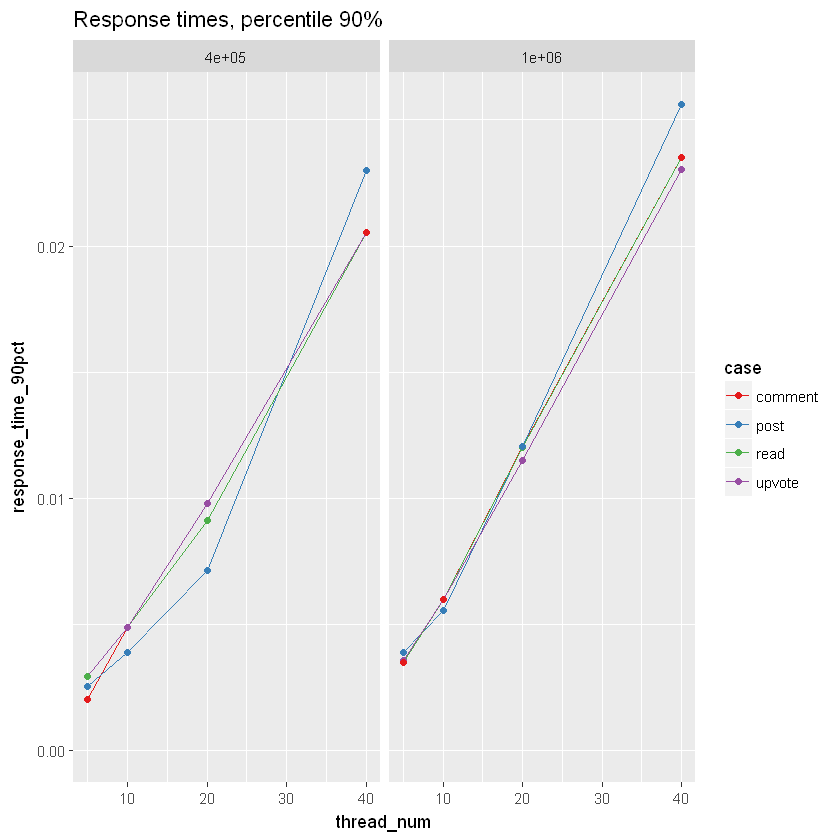

In [20]:
  ggplot(data = tidy[case != "finished"][case != "started"][,list(response_time_90pct = quantile(response_time, 0.9)), 
                                                            by="case,thread_num,posts_num"], 
         aes(x=thread_num, 
             y=response_time_90pct, 
             group=case, 
             colour=case)) + ylim(0,NA) +  
    scale_color_brewer(palette="Set1") + facet_grid( . ~ posts_num ) +
    geom_line() + geom_point() + ggtitle(paste0("Response times, percentile 90%")) 

Saving 6.67 x 6.67 in image


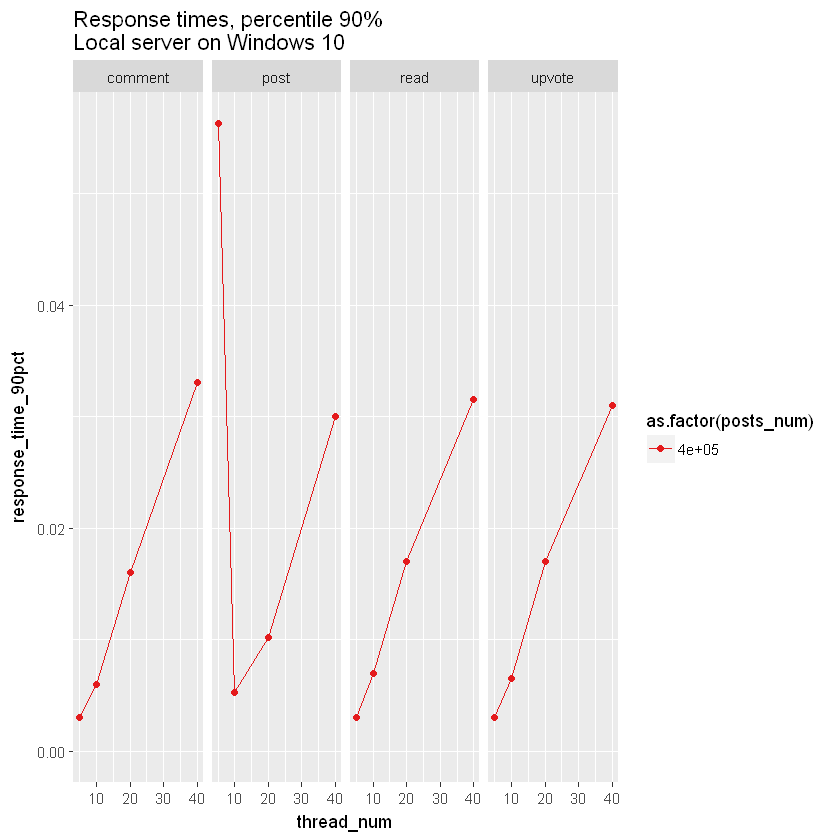

In [15]:
ggplot(data = tidy[case != "finished"][case != "started"][,list(response_time_90pct = quantile(response_time, 0.9)), 
                                                           by="case,thread_num,posts_num,deployment"][deployment=="windows"], 
         aes(x=thread_num, 
             y=response_time_90pct, 
             group=as.factor(posts_num), 
             colour=as.factor(posts_num))) + ylim(0,NA) + 
    scale_color_brewer(palette="Set1") + facet_grid( . ~ case ) + 
    geom_line() + geom_point()+ ggtitle(paste0("Response times, percentile 90%\nLocal server on Windows 10")) 

ggsave("resp_time.png")

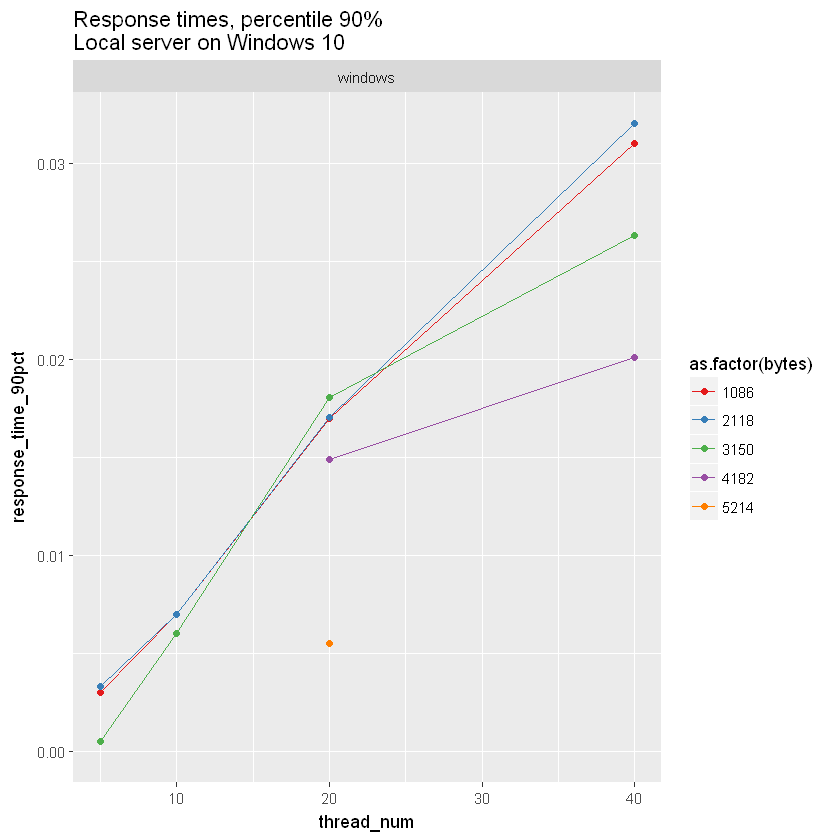

In [13]:
ggplot(data = tidy[case == "read"][,list(response_time_90pct = quantile(response_time, 0.9)), 
                                                           by="case,thread_num,posts_num,deployment,bytes"][deployment=="windows"], 
         aes(x=thread_num, 
             y=response_time_90pct, 
             group=as.factor(bytes), 
             colour=as.factor(bytes))) + ylim(0,NA) + 
    scale_color_brewer(palette="Set1") + facet_grid( . ~ deployment ) + 
    geom_line() + geom_point()+ ggtitle(paste0("Response times, percentile 90%\nLocal server on Windows 10")) 
